In [1]:
from ckanapi import RemoteCKAN
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
from pandas.io.json import json_normalize

ua = 'avoindata_ckanapi_example/1.0 ({0})'
ckan = RemoteCKAN('https://beta.avoindata.fi/data/fi/', user_agent=ua)
packages = ckan.action.package_search(q='Kansaneläkelaitos', fq = 'title:eläkkeensaajat')
resources = packages['results'][0]['resources'] 
url_csv = resources[0]['url']
url_json = resources[1]['url']
dat = pd.read_csv(url_csv, sep = ';', decimal = ',')

In [3]:
response = urlopen(url_json)
meta = json.loads(response.read())

## Datan ja metadatan kuvailu

**Datan kuvaustieto**

In [4]:
print(meta['description'])

Suomen eläketurva koostuu pääpiirteissään kahdesta lakisääteisestä eläkejärjestelmästä, kansaneläkejärjestelmästä ja työeläkejärjestelmästä. Lakisääteistä eläketurvaa ovat myös liikenne- ja tapaturmavakuutuslakien sekä sotilasvamma- ja sotilastapaturmalakien mukaiset eläkkeet, ns. SOLITA-eläkkeet. Tämä raportti sisältää tietoja kansan- ja/tai työeläkejärjestelmän eläkkeensaajien lukumäärästä ja keskimääräisistä kokonaiseläkkeistä. Mukana ovat myös ulkomaille maksetut eläkkeet. Lakisääteisen eläketurvan osalta raportti on lähes tyhjentävä, vain pelkkää SOLITA-eläkettä saavat henkilöt ja heidän eläkkeensä eivät ole mukana. Vapaaehtoisesta eläketurvasta on mukana vain työnantajan kustantama rekisteröity lisäeläketurva. Eri eläkelajeja ei voi summata yhteen, sillä henkilö voi saada samanaikaisesti eläkettä sekä kansan- että työeläkejärjestelmästä. Kelasta hänellä ei voi olla yhtä aikaa eri eläkelajien mukaista eläkettä, mutta työeläkkeenä hän voi saada samanaikaisesti sekä usean eläkelain 

**Datan muuttujatieto**

In [5]:
json_normalize(meta['resources'][0]['schema']['fields'])

,format,name,type
0,default,kuntanumero,integer
1,default,kunta,string
2,default,aikajakso,string
3,default,aika,string
4,default,elakelaji,string
5,default,sukupuoli,string
6,default,ikaryhma,string
7,default,elakejarjestelma,string
8,default,asuinmaa,string
9,default,saajat,integer


**Datan ensimmäiset rivit**

In [6]:
print(dat.head())

   kuntanumero      kunta aikajakso     aika elakelaji sukupuoli  ikaryhma  \
0            5   Alajärvi     vuosi  2003-12  Yhteensä  Yhteensä  Yhteensä   
1            9  Alavieska     vuosi  2003-12  Yhteensä  Yhteensä  Yhteensä   
2           10     Alavus     vuosi  2003-12  Yhteensä  Yhteensä  Yhteensä   
3           16   Asikkala     vuosi  2003-12  Yhteensä  Yhteensä  Yhteensä   
4           18     Askola     vuosi  2003-12  Yhteensä  Yhteensä  Yhteensä   

         elakejarjestelma asuinmaa  saajat  keskimaarainen_kokonaiselake_e_kk  
0  Kaikki eläkkeen saajat    Suomi  3177.0                             821.59  
1  Kaikki eläkkeen saajat    Suomi   781.0                             816.81  
2  Kaikki eläkkeen saajat    Suomi  3823.0                             865.13  
3  Kaikki eläkkeen saajat    Suomi  2580.0                             975.58  
4  Kaikki eläkkeen saajat    Suomi   964.0                             908.87  


In [7]:
plotdat = (dat
 .query('aikajakso == "vuosi"')
           .query('aika == "2017-12"')
 .query('elakelaji == "Yhteensä"')
 .query('sukupuoli == "Yhteensä"')
 .query('ikaryhma == "Yhteensä"')
 .query('elakejarjestelma == "Kaikki eläkkeen saajat"')
 .query('asuinmaa == "Suomi"')
 .sort_values(by='keskimaarainen_kokonaiselake_e_kk', ascending=False)
 .head(20))

#plt.bar(plotdat, height = )

## Kuvio

<BarContainer object of 20 artists>

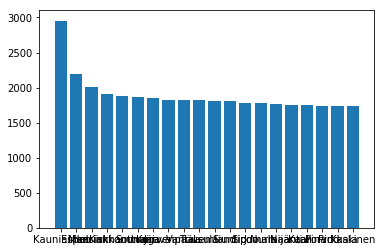

In [8]:
plt.bar(plotdat['kunta'], plotdat['keskimaarainen_kokonaiselake_e_kk'])

## Datastore-api

Jos et tarvitse koko aineistoa, voit suodattaa siitä osio SQL:llä käyttäen CKAN:n DataStore-rajapintaa.

Alla olevassa esimerkissä tehdään rajaus `kunta`-muuttujasta ja siis etsitään vaan kuntaa *Veteli* koskevat tiedot.

In [9]:
kunta = "Veteli"
taulu = resources[0]['id']
muuttuja = 'kunta'
urli = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}" WHERE {muuttuja} LIKE \'{kunta}\''
urli_plain = f'https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from "{taulu}"'
#urli = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\" WHERE %s LIKE '%s'" % (taulu, muuttuja, kunta)
#urli_plain = "https://beta.avoindata.fi/data/fi/data/api/3/action/datastore_search_sql?sql=SELECT * from \"%s\"" % (taulu)
response = urlopen(urli_plain)
da = json.loads(response.read())
dataa = json_normalize(da['result']['records'])
#dataa
print(dataa.head())

                                          _full_text  _id     aika aikajakso  \
0  '-12':5 '2003':4 '3177':13 '5':1 '59':15 '821'...    1  2003-12     vuosi   
1  '-12':5 '2003':4 '781':13 '81':15 '816':14 '9'...    2  2003-12     vuosi   
2  '-12':5 '10':1 '13':15 '2003':4 '3823':13 '865...    3  2003-12     vuosi   
3  '-12':5 '16':1 '2003':4 '2580':13 '58':15 '975...    4  2003-12     vuosi   
4  '-12':5 '18':1 '2003':4 '87':15 '908':14 '964'...    5  2003-12     vuosi   

  asuinmaa        elakejarjestelma elakelaji  ikaryhma  \
0    Suomi  Kaikki eläkkeen saajat  Yhteensä  Yhteensä   
1    Suomi  Kaikki eläkkeen saajat  Yhteensä  Yhteensä   
2    Suomi  Kaikki eläkkeen saajat  Yhteensä  Yhteensä   
3    Suomi  Kaikki eläkkeen saajat  Yhteensä  Yhteensä   
4    Suomi  Kaikki eläkkeen saajat  Yhteensä  Yhteensä   

  keskimaarainen_kokonaiselake_e_kk      kunta kuntanumero saajat sukupuoli  
0                            821,59   Alajärvi           5   3177  Yhteensä  
1             